In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

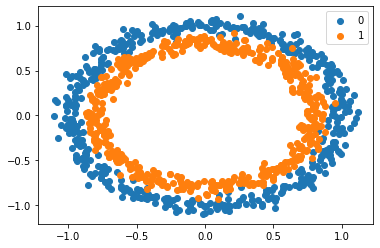

In [18]:
from sklearn.datasets import make_circles
#generate the dataset
X,y = make_circles(n_samples=1000, noise=0.05, random_state=1)
# select indices of points with each class label
for i in range(2):
    samples_ix = np.where(y == i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label = str(i))
plt.legend()
plt.show()

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(0,x)

In [20]:
def forwardPass(X, parameters):
    W1, W2, b1, b2 = parameters["W1"],parameters["W2"],parameters["b1"],parameters["b2"]
    Z1 = np.dot(X, W1.T) + b1.T
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2.T) + b2.T # np.dot() => product of two arrays
    A2 = sigmoid(Z2)
    return A2

In [21]:
# Testing the forward pass

#initializing the weights randomly
W1 = np.array([[2,3],[0.5,-5]])
b1 = np.array([[1],[-2]])
W2 = np.array([[0.1,-4.5]])
b2 = np.array([[0]])
parameters = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2 }

# Picking a data point
x_1 = X[1]

#Executing the forward pass
A2 = forwardPass(x_1, parameters)

# Printing results
print("Output = ", A2)
print("Prediction = ", (A2 > 0.5) * 1.0)
print("Target = ", y[0])

Output =  [[0.03266079]]
Prediction =  [[0.]]
Target =  1


In [22]:
#Our model is not trained and the weights are initialized randomly...so the prediction is not correct

### III - Weights Initialization

In [23]:
#Initializing with small values
def initializeParametersRandom(inputSize, hiddenlayerSize, outputSize):
    W1 = np.random.randn(hiddenlayerSize, inputSize) * 1e-6
    W2 = np.random.randn(outputSize, hiddenlayerSize) * 1e-6
    b1 = np.zeros(hiddenlayerSize, 1)
    b2 = np.zeros(outputSize, 1)
    
    parameters = {"w1" : W1, "b1" : b1 , "W2" : W2 , "b2" : b2 }
    return parameters

In [24]:
# He Initializing 
def initializeParametersHe(inputSize, hiddenlayerSize, outputSize):
    W1 = np.random.randn(hiddenlayerSize, inputSize) * np.sqrt(2/inputSize)
    W2 = np.random.randn(outputSize, hiddenlayerSize) * np.sqrt(2/hiddenlayerSize)
    b1 = np.zeros(hiddenlayerSize, 1)
    b2 = np.zeros(outputSize, 1)
    
    parameters = {"w1" : W1, "b1" : b1 , "W2" : W2 , "b2" : b2 }
    return parameters

In [25]:
# preparing our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1)
#X_train = X_train.T
#X_test = X_test.T
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

In [26]:
hiddenLayersSize = 10 # number of hidden layers in neurons (2)
inputSize = X_train.shape[1] # number of input features (2)
outputSize = y_train.shape[1] # number of output features (1)

In [28]:
from Utils_initialization import forwardPass, fit


ModuleNotFoundError: No module named 'Utils_activation'

In [ ]:
parameters_1 = initializeParametersHe(inputSize, hiddenLayerSize, outputSize)
parameters_1 = fit(X_train, y_train, 10000, 0.1, parameters_1)

In [ ]:
# Evaluate the model that was initialized with He initialization
from sklearn.metrics import accuarcy_score
_, _, A2 = forwardPass(X_test, y_test, parameters_1)
y_test_classes = y_test
y_pred_classes = [1 if a > 0.5 else 0 for a in A2]
print("Accuracy = ", accuracy_score(y_test_classes, y_pred_classes))

In [ ]:
parameters_2 = initializeParametersRandom(inputSize, hiddenLayerSize, outputSize)
parameters_2 = fit(X_train, y_train, 10000, 0.1, parameters_2)

In [ ]:
# Evaluate the model that was initialized with He initialization
from sklearn.metrics import accuarcy_score
_, _, A2 = forwardPass(X_test, y_test, parameters_2)
y_test_classes = y_test
y_pred_classes = [1 if a > 0.5 else 0 for a in A2]
print("Accuracy = ", accuracy_score(y_test_classes, y_pred_classes))

### IV - Activation functions

In [29]:
from Utils_activation import forwardPass, fit

ModuleNotFoundError: No module named 'utils_activation'

In [30]:
#Linear activation function
def linear_activation(x):
    return 0.5 * x
#It's derivative
def linear_activation_derivative(x):
    return np.where(True, 0.5, 0)

In [31]:
parameters_3 = initializeParametersHe(inputSize, hiddenLayerSize, outputSize)
parameters_3 = fit(X_train, y_train, 10000, 0.1,parameters_3 , linear_activation, linear_activation_derivative)

NameError: name 'hiddenLayerSize' is not defined

In [ ]:
from sklearn.metrics import accuarcy_score
_, _, A2 = forwardPass(X_test, y_test, parameters_3, linear_activation)
y_test_classes = y_test
y_pred_classes = [1 if a > 0.5 else 0 for a in A2]
print("Accuracy = ", accuracy_score(y_test_classes, y_pred_classes))

In [32]:
#ReLU activation function
def relu(x):
    return np.maximum(0,x) 
#It's derivative
def relu__derivative(x):
    return np.where(x > 0, 1, 0)

In [ ]:
parameters_4 = initializeParametersHe(inputSize, hiddenLayerSize, outputSize)
parameters_4 = fit(X_train, y_train, 10000, 0.1,parameters_3 , relu, relu_derivative)

In [ ]:
from sklearn.metrics import accuarcy_score
_, _, A2 = forwardPass(X_test, y_test, parameters_4, relu)
y_test_classes = y_test
y_pred_classes = [1 if a > 0.5 else 0 for a in A2]
print("Accuracy = ", accuracy_score(y_test_classes, y_pred_classes))